In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from pint import UnitRegistry
u = UnitRegistry()
u.default_format = 'C'
import math as m

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()
from IPython.display import display_latex

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
h = 8
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

#from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

# Publish
from ipypublish.scripts import nb_setup

In [150]:
def hdf5store(filename, keys, df, **kwargs):
    store = pd.HDFStore(filename)
    store.put(keys, df, format='table', data_columns=True)
    store.get_storer('mydata').attrs.metadata = kwargs
    store.close()
    
def kb_U_eq(df,charge_config,units,blast_param,distance):
    coef_df = df[(df.charge_configuration == charge_config) &
                 (df.system_of_units == units) &
                 (df.blast_parameter == blast_param)]
    num_eq = df[(df.charge_configuration == charge_config) &
                (df.system_of_units == units) &
                (df.blast_parameter == blast_param)].function.nunique()
    lower_range = df[(df.charge_configuration == charge_config) &
                     (df.system_of_units == units) &
                     (df.blast_parameter == blast_param)].lower_range.unique()
    upper_range = df[(df.charge_configuration == charge_config) &
                     (df.system_of_units == units) &
                     (df.blast_parameter == blast_param)].upper_range.unique()

    c_s = coef_df.coefficients[(coef_df.variable == 'U')] # U coefficents
    u = 0
    U = 0
    Udist = []
    Uall = []
    dall = []
    func = []
    for e in range(0,num_eq): # for each equation in num_eq
        dsub = distance[(distance>=lower_range[e]) & # distances over which the fuction is valid.
                        (distance<=upper_range[e])]  # corresponds to the number of functions.
        for T in np.log10(dsub): # for each distance in dsub.
            n = 0 # resets the power in the function to zero
            for c in c_s: # for each coefficient in c_s.
                u = u + c*T**n # totals u's together
                n += 1 # increments to the next term in the function
                func.append(u)
            Udist.append(u) # collects each total u at each distance
            u = 0 # resets the u value to zero for the new distance dsub
        Uall.append(Udist) # collects each group of u's at each distance and function.
        Udist = [] # resets the Udist value to zero for the new equation
        dall.append(dsub)
        flat_dall = [item for sublist in dall for item in sublist]
        #flat_Uall = [item for sublist in Uall for item in sublist]
    return Uall,flat_dall,c_s

def kb_Y_eq(df,charge_config,units,blast_param,U):
    coef_df = df[(df.charge_configuration == charge_config) &
                 (df.system_of_units == units) &
                 (df.blast_parameter == blast_param)]  
    coef = coef_df.coefficients[(coef_df.variable == 'Y')]
    
    y = 0 # set y value to zero.
    Y = [] # clear Y array
    Yall = []
    for u_ary in U: # for each u array in U
        for u in u_ary: # for each u value in u_ary
            n = 0
            for c in coef: # for each coefficient in the function
                y = y + c*u**n # totals the y's together
                n += 1 # increments to the next term in the function
            Y.append(u) # collects each total y at each distance
            u = 0 # resets the u value to zero for the new u_ary
        Yall.append(Y) # collects each group of Y's at each u and function
        Y = []
        flat_Yall = [item for sublist in Yall for item in sublist]
    return flat_Yall

In [164]:
filename = 'kb_equation_data.csv'
df = pd.read_csv(filename)
distance = np.asarray([1,10,100])
#distance = np.arange(0,101,.1)
u,d,f = kb_U_eq(df,'test','imperial','test',distance)
y = kb_Y_eq(df,'test','imperial','test',u)
u
y

[[1.0, 2.0, 3.0]]

[1.0, 2.0, 3.0]

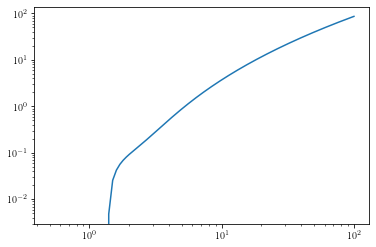

In [160]:
plt.loglog(d,y)

In [148]:
for e in range(0,[1]):
    print(e)

TypeError: 'list' object cannot be interpreted as an integer

# Airblast Parameters From TNT Spherical Air Burst and Hemispherical Surface Burst
*S. Kevin McNeill*

*August 28, 2019*

## Analysis
This notebook will plot the following blast parameters for spherical air burst and hemispherical surface burst in both imperial and metric units:
* incident pressure
* incident impulse
* reflected pressure
* reflected impulse
* shock front velocity
* arrival time
* positive phase duration


## Data
Data for these plots was built from the original paper *Airblast Parameters from TNT Spherical Air Burst and Hemispherical Surface Burst* by Charles N. Kingery and Gerald Bulmash.  It was hand typed into excel and then saved as a HDF5 file.

In [154]:
filename = 'kb_equation_data.csv'
df = pd.read_csv(filename)

In [155]:
hdf5store('kb_coefficient.h5', keys, df, **kwargs)

NameError: name 'keys' is not defined

In [49]:
charge_config = 'hemispherical'
units = 'imperial'
blast_param = 'positive_phase_duration'
U = np.arange(0,200,0.1)

num_eq = df[(df.charge_configuration == charge_config) &
          (df.system_of_units == units) &
          (df.blast_parameter == blast_param)].function.nunique()
lower_range = df[(df.charge_configuration == charge_config) &
          (df.system_of_units == units) &
          (df.blast_parameter == blast_param)].lower_range.unique()
upper_range = df[(df.charge_configuration == charge_config) &
          (df.system_of_units == units) &
          (df.blast_parameter == blast_param)].upper_range.unique()
coef_df = df[(df.charge_configuration == charge_config) &
          (df.system_of_units == units) &
          (df.blast_parameter == blast_param)]
    
Coef = coef_df.coefficients[(coef_df.variable == 'Y')]


y = 0
Y = []
for e in range(0,num_eq):
    Unew = U[(U>=lower_range[e]) & (U<=upper_range[e])]
    for u in Unew: 
        n = 0
        for c in Coef: 
            y = y + c*u**n
            n += 1
        Y.append(u)
        u = 0

## Plots


In [ ]:
fig = plt.figure(figsize=(w,h));
plt.xlabel('Distance (ft)');
plt.ylabel('Kingery Bulmash U Parameter');
plt.plot(distance,U, 'ro', linestyle = '-');

In [ ]:
coef_df = df[(df.charge_configuration == charge_config) &
             (df.system_of_units == units) &
             (df.blast_parameter == blast_param)]

Coef = coef_df.coefficients[(coef_df.variable == 'Y')]
y = 0
Y = []
for u in U: 
    n = 0
    for c in Coef: 
        y = y + c*u**n
        print(n,c,u,c*u**n)
        n += 1
    Y.append(y)
    u = 0
print(U,Y)

## References